# Tensor Operations
## Create a tensor from a NumPy array and perform element-wise operations (addition, multiplication, etc.).

In [1]:
import torch
import numpy

In [2]:
a = numpy.array([1, 2, 3])
b = numpy.array([4, 5, 6])
a
b

array([4, 5, 6])

In [3]:
a_torch = torch.from_numpy(a)
b_torch = torch.from_numpy(b)
a_torch, b_torch

(tensor([1, 2, 3]), tensor([4, 5, 6]))

In [4]:
addition = a_torch + b_torch
multiplication = a_torch * b_torch
addition, multiplication

(tensor([5, 7, 9]), tensor([ 4, 10, 18]))

## Convert a tensor back to a NumPy array.

In [5]:
addition.device, multiplication.device

(device(type='cpu'), device(type='cpu'))

In [6]:
addition_array = addition.numpy()
multiplication_array_ = multiplication.numpy()
addition_array, multiplication_array_

(array([5, 7, 9]), array([ 4, 10, 18]))

## Perform matrix multiplication between two 2D tensors.

In [7]:
c = torch.rand(4 ,6)
d = torch.rand(6, 6)
c, d

(tensor([[0.5452, 0.1238, 0.6354, 0.5224, 0.7272, 0.6824],
         [0.0814, 0.9561, 0.7302, 0.6615, 0.8498, 0.3783],
         [0.9688, 0.7899, 0.4341, 0.5289, 0.7707, 0.4578],
         [0.5595, 0.0086, 0.3169, 0.6171, 0.1667, 0.7125]]),
 tensor([[0.6587, 0.0957, 0.4310, 0.3618, 0.4060, 0.8845],
         [0.7234, 0.8691, 0.8596, 0.4511, 0.0537, 0.4711],
         [0.4530, 0.0667, 0.8004, 0.1360, 0.1681, 0.1727],
         [0.0407, 0.4311, 0.8353, 0.1085, 0.5058, 0.8454],
         [0.5802, 0.5941, 0.0732, 0.5537, 0.7507, 0.1485],
         [0.1600, 0.8420, 0.1735, 0.1174, 0.9058, 0.4381]]))

In [8]:
cd_mul = torch.mm(c, d)
cd_mul

tensor([[1.2889, 1.4339, 1.4580, 0.8790, 1.7630, 1.4989],
        [1.6565, 1.9960, 2.1217, 1.1468, 1.5223, 1.4996],
        [1.9480, 1.8794, 2.0215, 1.3037, 1.7694, 2.0659],
        [0.7541, 1.0471, 1.1534, 0.4923, 1.3635, 1.4122]])

## Reshape and transpose a tensor.

In [9]:
c_transpose = c.T
c_transpose

tensor([[0.5452, 0.0814, 0.9688, 0.5595],
        [0.1238, 0.9561, 0.7899, 0.0086],
        [0.6354, 0.7302, 0.4341, 0.3169],
        [0.5224, 0.6615, 0.5289, 0.6171],
        [0.7272, 0.8498, 0.7707, 0.1667],
        [0.6824, 0.3783, 0.4578, 0.7125]])

In [10]:
cd_mul_reshape = cd_mul.reshape(3,8)
cd_mul_reshape

tensor([[1.2889, 1.4339, 1.4580, 0.8790, 1.7630, 1.4989, 1.6565, 1.9960],
        [2.1217, 1.1468, 1.5223, 1.4996, 1.9480, 1.8794, 2.0215, 1.3037],
        [1.7694, 2.0659, 0.7541, 1.0471, 1.1534, 0.4923, 1.3635, 1.4122]])

# Simple Neural Network from Scratch

In [11]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [12]:
from torch import nn

In [13]:
# Create *known* parameters
weight = 0.6
bias = 0.4

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.4000],
         [0.4060],
         [0.4120],
         [0.4180],
         [0.4240],
         [0.4300],
         [0.4360],
         [0.4420],
         [0.4480],
         [0.4540]]))

In [14]:
len(X), len(y)

(100, 100)

In [15]:
X.shape

torch.Size([100, 1])

In [16]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(X, y)

dataset_size = len(dataset)
train_size = int(0.9 * dataset_size)
test_size = dataset_size - train_size

# Split the dataset into training and testing sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
len(train_dataset), len(test_dataset)

(90, 10)

In [17]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [20]:
# Define loss function (mean squared error)
loss_fn = nn.MSELoss()

# Define optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [21]:
# Training loop with evaluation
epochs = 100
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    for batch_X, batch_y in train_loader:  # Iterate over mini-batches
        # Move data to the same device as the model
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        y_pred = model(batch_X)

        # Compute loss
        loss = loss_fn(y_pred, batch_y)

        # Zero gradients, perform backward pass, and update weights
        optimizer.zero_grad()  # Clear the gradients
        loss.backward()        # Backpropagation
        optimizer.step()       # Update the weights

    # Print training loss every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {loss.item():.4f}')

    # Evaluation step after each epoch
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to track gradients during evaluation
        test_loss = 0
        for test_X, test_y in test_loader:
            # Move test data to the same device as the model
            test_X, test_y = test_X.to(device), test_y.to(device)

            # Make predictions
            test_pred = model(test_X)

            # Accumulate the test loss
            test_loss += loss_fn(test_pred, test_y).item()

        # Print test loss after each epoch
        if (epoch + 1) % 10 == 0:
          print(f'Test Loss (MSE): {test_loss:.4f}')

Epoch [10/100], Training Loss: 0.0057
Test Loss (MSE): 0.0422
Epoch [20/100], Training Loss: 0.0401
Test Loss (MSE): 0.0354
Epoch [30/100], Training Loss: 0.0101
Test Loss (MSE): 0.0303
Epoch [40/100], Training Loss: 0.0138
Test Loss (MSE): 0.0255
Epoch [50/100], Training Loss: 0.0254
Test Loss (MSE): 0.0207
Epoch [60/100], Training Loss: 0.0056
Test Loss (MSE): 0.0165
Epoch [70/100], Training Loss: 0.0147
Test Loss (MSE): 0.0120
Epoch [80/100], Training Loss: 0.0020
Test Loss (MSE): 0.0087
Epoch [90/100], Training Loss: 0.0018
Test Loss (MSE): 0.0061
Epoch [100/100], Training Loss: 0.0040
Test Loss (MSE): 0.0042


# Train a CNN on MNIST

# Transfer Learning with Pretrained Models

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epochs: 0, Cost: 0.05651784688234329
Epochs: 1, Cost: 0.003763780929148197
Epochs: 2, Cost: 0.014716449193656445
Epochs: 3, Cost: 0.0022014789283275604
Epochs: 4, Cost: 0.001706457231193781


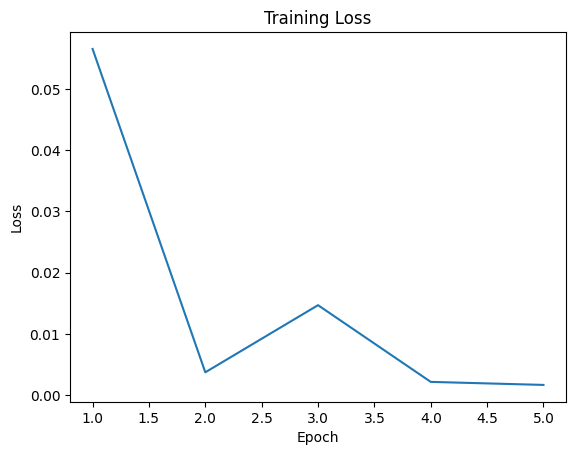

In [23]:
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

loss_history = []

for epoch in range(5):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history.append(loss.item())
    print(f"Epochs: {epoch}, Cost: {loss}")



plt.plot(range(1, 6), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Transfer Learning with Pretrained Models

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
import numpy as np

In [25]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input dimensions
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])


dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


class_names = ['airplane', 'car']
indices = [i for i, target in enumerate(dataset.targets) if dataset.classes[target] in class_names]
filtered_dataset = Subset(dataset, indices)


target_map = {class_name: i for i, class_name in enumerate(class_names)}
filtered_dataset.targets = [target_map[dataset.classes[target]] for target in np.array(dataset.targets)[indices]]


train_loader = DataLoader(dataset=filtered_dataset, batch_size=64, shuffle=True)


Files already downloaded and verified


In [26]:
# Load a pretrained ResNet model
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to output 2 classes
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# Move the model to the selected device
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        outputs = model(batch_X)
        loss = loss_fn(outputs, batch_y)

        # Zero gradients, perform backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

    # Evaluation step
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the dataset: {accuracy:.2f}%')

Epoch [1/5], Loss: 0.0181
Accuracy of the model on the dataset: 100.00%
Epoch [2/5], Loss: 0.0000
Accuracy of the model on the dataset: 100.00%
Epoch [3/5], Loss: 0.0000
Accuracy of the model on the dataset: 100.00%
Epoch [4/5], Loss: 0.0000
Accuracy of the model on the dataset: 100.00%
Epoch [5/5], Loss: 0.0000
Accuracy of the model on the dataset: 100.00%


# Save and Load Models

In [29]:
model_cnn = CNN().to(device)
torch.save(model_cnn.state_dict(), 'cnn_mnist_model.pth')
print("Model saved!")

Model saved!


In [30]:
# Load the FashionMNIST dataset
fashion_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Same normalization as MNIST
])

fashion_test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=fashion_transform, download=True)
fashion_test_loader = torch.utils.data.DataLoader(dataset=fashion_test_dataset, batch_size=64, shuffle=False)

# Re-initialize the model architecture
model_fashion = CNN().to(device)

# Load the trained model
model_fashion.load_state_dict(torch.load('cnn_mnist_model.pth'))
model_fashion.eval()  # Set to evaluation mode

# Evaluation step on FashionMNIST test set
correct = 0
total = 0

with torch.no_grad():
    for images, labels in fashion_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_fashion(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the FashionMNIST test set: {accuracy:.2f}%')


<ipython-input-30-e3e93359dda0>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_fashion.load_state_dict(torch.load('cnn_mnist_model.pth'))


Accuracy of the model on the FashionMNIST test set: 9.42%
